In [6]:
# common model
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

# conmon model helper
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 
import seaborn as sns 
from pandas.tools.plotting import scatter_matrix 

# configure visualization 
%matplotlib inline 
mpl.style.use('ggplot')
sns.set_style('white')
# pylab.rcParams['figure.figsize'] = 12.8


In [9]:
import pandas as  pd
data_raw = pd.read_csv(r'D:\personal\competition\kaggle\titanic\train.csv')
data_val = pd.read_csv(r'D:\personal\competition\kaggle\titanic\test.csv')
data1 = data_raw.copy(deep=True)   # 使用副本进行操作，否则python的赋值机制就是直接修改了原数据 
data_cleaner = [data1, data_val]   # 放在一起方便后面一起清洗数据 

# preview data 
print(data_raw.info())
data_raw.sample(10)  # 随机抽取十个样本 .DataFrame的方法sample


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S


In [10]:
#  输出数据观察的结果 ，统计缺失值个数 
print('Train columns with null values:\n',data1.isnull().sum())  # df的方法，计算每一列的null值 个数 
print('_'*10)
print('Test/Validation columns with null values:\n',data_val.isnull().sum())
print('_'*10)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
__________
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
__________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
# Completing data: complete or delete missing values 
for dataset in data_cleaner:  # for循环 处理了训练数据和测试数据
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True) # 用fillna方法，利用自身中位数填补缺失值 
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)  # mode方法是什么  ???
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)  # 利用inplace=True，直接替换原缺失数据，不需要重新赋值到变量上 

# delete data
drop_column = ['PassengerId','Cabin','Ticket']  # 从上面的info信息中，可知Cabin缺失过多，删掉，PassengerId和Ticket对模型构建无意义，删掉 
data1.drop(drop_column,axis=1,inplace=True)  # drop可以删除多列，axis=1表示列，inplace=True表示直接替换到data1上，即直接改变data1

# 输出completing完成后的结果 
print(data1.isnull().sum())
print('-'*10)
print(data_val.isnull().sum())    # 为什么测试数据不删掉cabin，为什么不保持训练和测试的特征一致呢？

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [12]:
# create: feature engineering for train and test/validation dataset 
for dataset in data_cleaner:  # 构造特征也用循环处理训练集和测试集 
    # 离散变量 
    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  #家庭成员数目=兄弟姐妹人数+父母小孩人数+自己 
    dataset['IsAlone'] = 1 # 二值型特征，1表示单身，0表示非单身。此处先初始化为1，后面根据FamilySize将1改为0
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0 # 利用 df.loc[bool] 进行值修改，修改了状态
    # 从名字中提取信息Title，名字中的头衔，比如Mr, Mrs ，Master等
    dataset['Title'] = dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]  
    
    
    # 连续变量 ，可以分箱进行离散化 ，就可以分等级了 。返回的是行是样本，列是该值属于哪个分段区间，值是分段区间。分段区间后可以encoder。
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)  # 将连续变量的Fare分成4个箱，每个箱内的个数相同。qcut，即每个票价层次的票数是一样多的。
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5) # 将连续变量的Age分成5个箱，每个箱内的个数可不同。cut 
    
stat_min = 10 
title_names = (data1['Title'].value_counts()<stat_min)  # value_count显示类别为index，统计结果才是里面的data。这返回一个bool 

# 对Title特征进行筛选，如果title_names的数目是小于10的，替换为Misc，否则不变，此处x表示Title数据里面的元素
data1['Title'] = data1['Title'].apply(lambda x:'Misc' if title_names.loc[x] == True else x) # 此处的x为Title中元素，也是title_names的index
# 通过loc[index]取出对应元素的逻辑值，若当前Title元素小于10也就是真返回MIsc，否则不变返回Title元素 ，同时赋值给Title列

print(data1['Title'].value_counts())
print('-'*10)


# preview data again 
data1.info()
data_val.info()
data1.sample(10)  # 随机抽十个样本 

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
358,1,3,"McGovern, Miss. Mary",female,28.0,0,0,7.8792,Q,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
135,0,2,"Richard, Mr. Emile",male,23.0,0,0,15.0458,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
547,1,2,"Padro y Manent, Mr. Julian",male,28.0,0,0,13.8625,C,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
571,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S,3,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
489,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,15.9000,S,3,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
490,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,28.0,1,0,19.9667,S,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.5500,S,11,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
554,1,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,1,1,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
473,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,13.7917,C,1,1,Mrs,"(7.91, 14.454]","(16.0, 32.0]"
704,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


In [22]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1


In [14]:
# convert : categorical data to dummy variables . convert objects to category using label encoder for train and test/validation data

label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])  # 对原数据的sex进行编码后存到特征Sex_Code
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked']) 
    dataset['Title_Code'] = label.fit_transform(dataset['Title']) 
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
Target = ['Survived']

data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone'] # 要画图观察的 
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']  # 用来训练模型的 
data1_xy = Target + data1_x
print('Original X Y:',data1_xy,'\n')

data1_x_bin = ['Sex_Code','Pclass','Embarked_Code','Title_Code','FamilySize','AgeBin_Code','FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y:',data1_xy_bin, '\n')

data1_dummy = pd.get_dummies(data1[data1_x])  # get_dummies将obejct的(非数值)的拆出来成多个变量 
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy 
print('Dummy X Y :',data1_xy_dummy,'\n')

Original X Y: ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y: ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y : ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



In [16]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [23]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1


In [17]:
# 再次观察数据 
print('Train columns with null values:\n',data1.isnull().sum()) 
print('-'*10)
print(data1.info())
print('-'*10)

print('Test/Validation columns with null values:\n',data_val.isnull().sum())
print('-'*10)
print(data_val.info())
print('-'*10)

data_raw.describe(include='all')

Train columns with null values:
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null categor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
# Split Training and Testing Data 
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc],data1[Target],random_state=2019)
train1_x_bin,test1_x_bin,train1_y_bin,test1_y_bin = model_selection.train_test_split(data1[data1_x_bin],data1[Target],random_state=2019)
train1_x_dummy,test1_x_dummy,train1_y_dummy,test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy],data1[Target],random_state=2019)

print('Data1 Shape:{}'.format(data1.shape))
print('Train1 Shape:{}'.format(train1_x.shape))
print('Test1 Shape:{}'.format(test1_x.shape))

train1_x_bin.head()

Data1 Shape:(891, 19)
Train1 Shape:(668, 8)
Test1 Shape:(223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
1,0,1,0,3,2,2,3
428,1,3,1,2,1,1,0
439,1,2,2,2,1,1,1
652,1,3,2,2,1,1,1
414,1,3,2,2,1,2,1


In [28]:
# Step 4:Perform Exploratory Analysis with Statistics 
for x in data1_x:
    if data1[x].dtype != 'float64':  
        print('Survival Correlation by:',x)
        print(data1[[x,Target[0]]].groupby(x, as_index=False).mean())  #as_index=False表示分组key不作为索引，求组均值  
        print('-'*10) 
        
print(pd.crosstab(data1['Title'],data1[Target[0]])) 


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
----------
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
----------
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
----------
Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
----------
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
----------
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
----------
Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1       

In [26]:
data1[['Sex',Target[0]]].groupby('Sex', as_index=False).mean() # as_index=False表示分组key不作为索引,改为序号.分组后求每组非分组key的均值 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
data1[['Sex',Target[0]]]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
5,male,0
6,male,0
7,male,0
8,female,1
9,female,1


C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


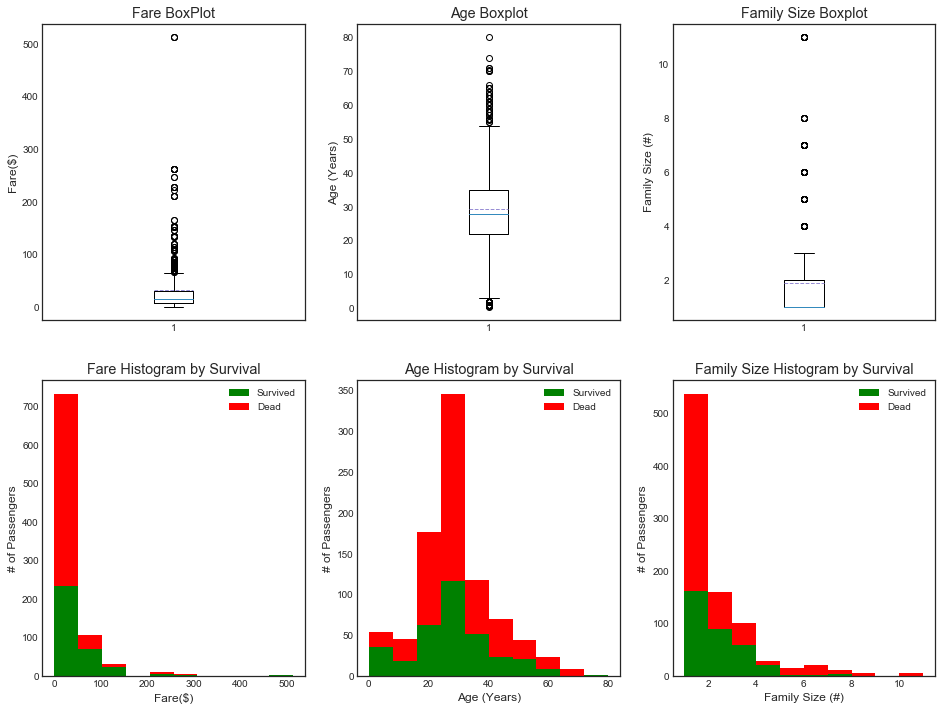

In [29]:
# graph ，此处为了学习所以画很多图 。画箱线图显示连续值变量的异常情况，画直方图显示连续值变量与因变量关系 
plt.figure(figsize=[16,12])

plt.subplot(231) # 总共两行，每行三个图，当前画第一个 
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)   # 默认k=1.5，表示中度异常 
plt.title('Fare BoxPlot')
plt.ylabel('Fare($)')

plt.subplot(232)
plt.boxplot(x=data1['Age'],showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x=[ data1[data1['Survived']==1]['Fare'] , data1[data1['Survived']==0]['Fare'] ],
         stacked=True,color=['g','r'], label=['Survived','Dead'])  # x有两个元素，是图像重叠的效果把.此处的label是哪个对象的?
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare($)')
plt.ylabel('# of Passengers')
plt.legend()  # 显示图例 

plt.subplot(235)  # hist的y信息是怎么画出来的????
plt.hist(x=[ data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],   
         stacked=True, color=['g','r'], label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

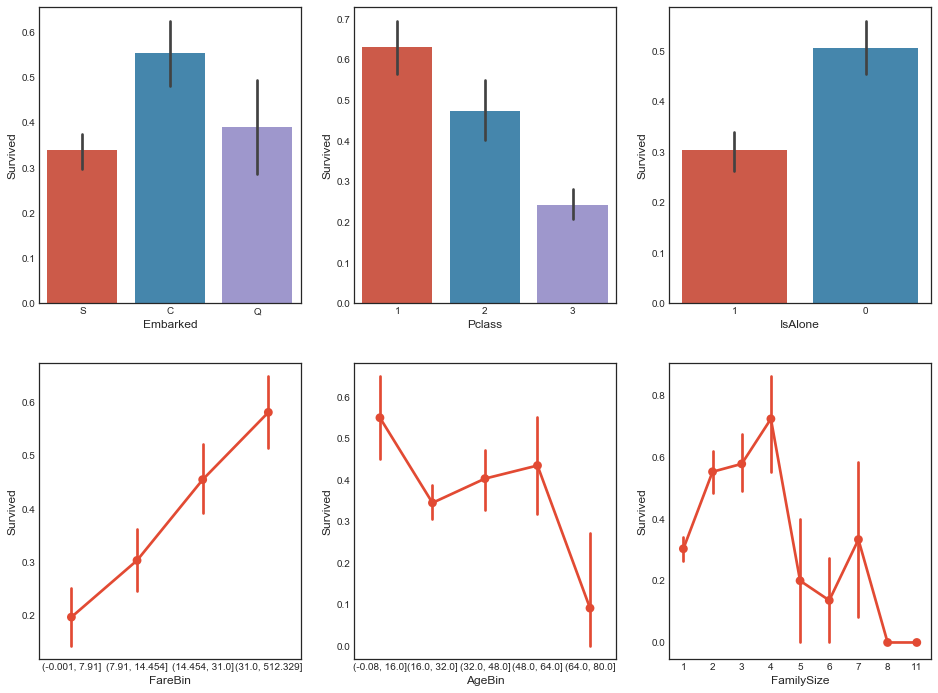

In [32]:
# use seborn for multi-variable comparison

# 画出每个特征与survival的关系  
fig, saxis = plt.subplots(2,3,figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])   # 纵轴的小数表示没看懂，加起来也不是1 
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1,ax=saxis[0,1])  # order为按照什么顺序排列的意思 
sns.barplot(x='IsAlone',y='Survived',order=[1,0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin',y='Survived',data=data1,ax=saxis[1,0])  # 同，看不懂纵轴的小数表示 
sns.pointplot(x='AgeBin',y='Survived',data=data1,ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5,1,'Pclass vs Family Size Survival Comparison')

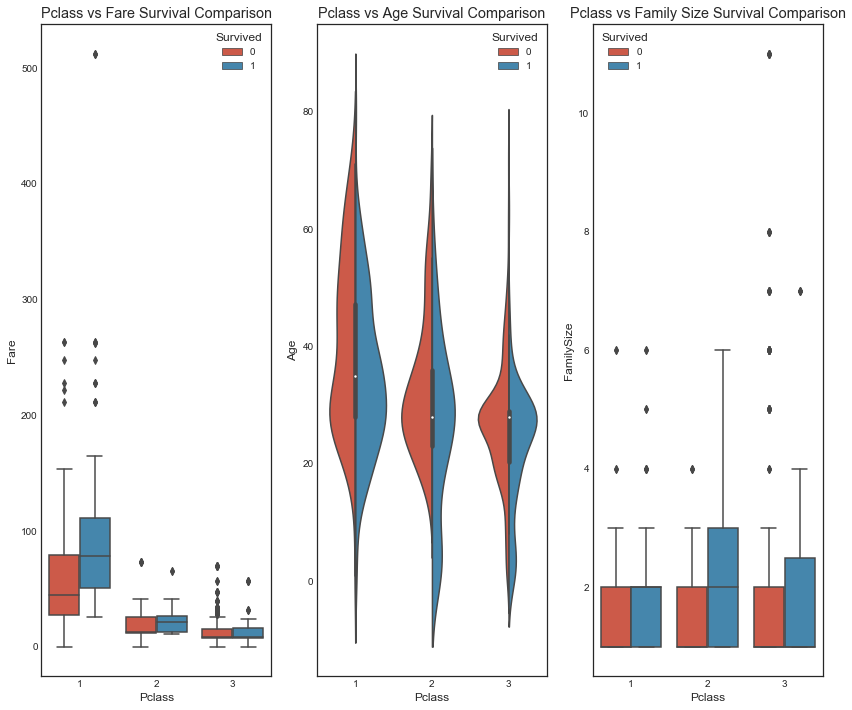

In [33]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5,1,'Sex vs IsAlone Survival Comparison')

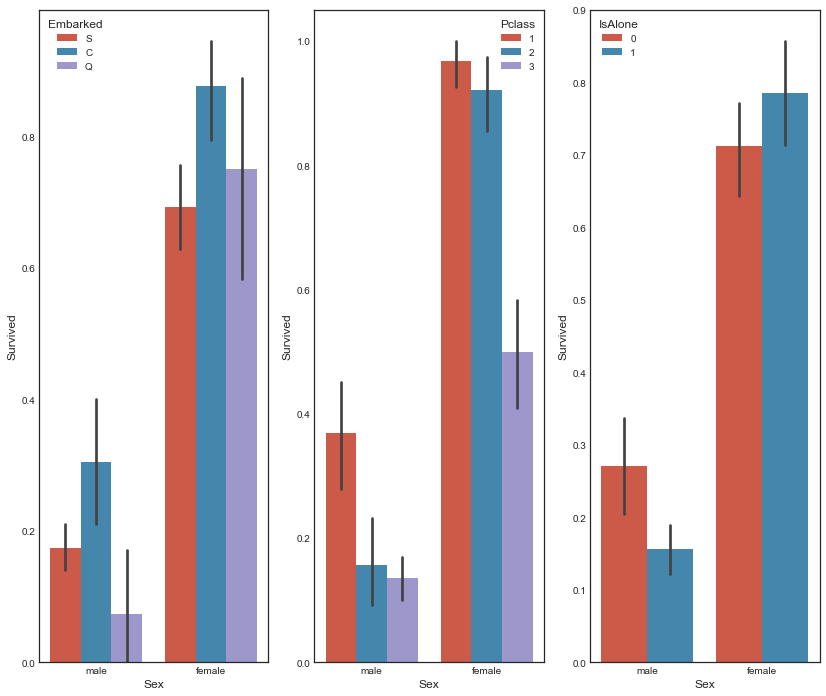

In [34]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

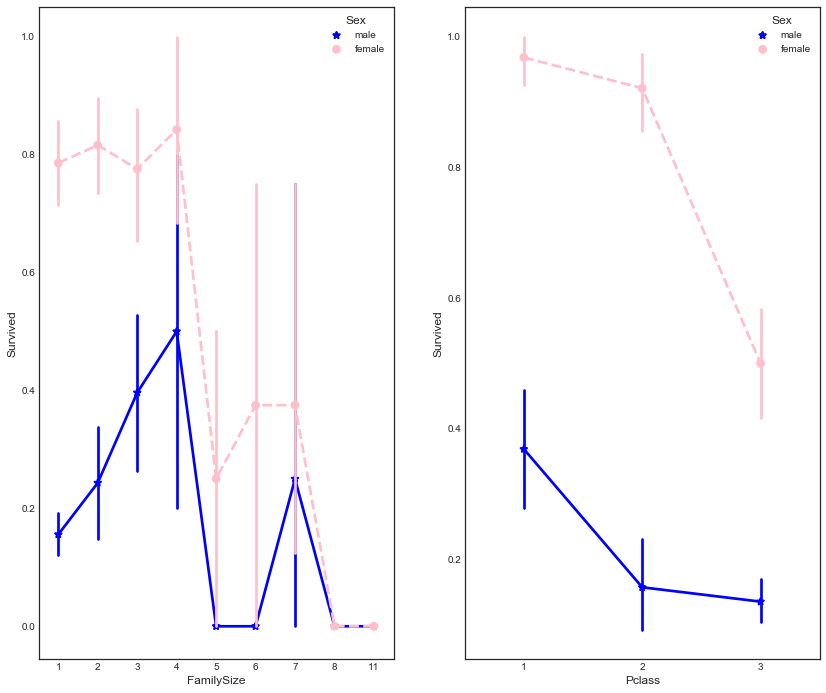

In [35]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


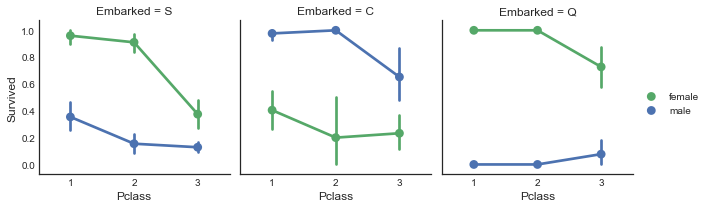

In [36]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

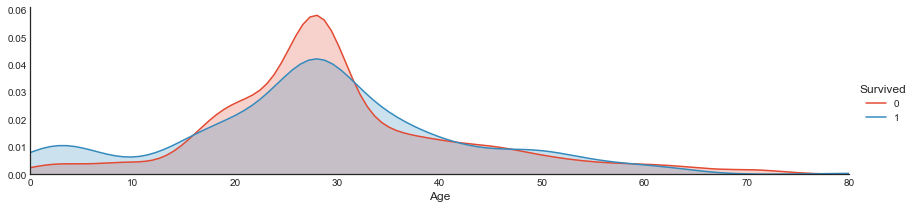

In [37]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

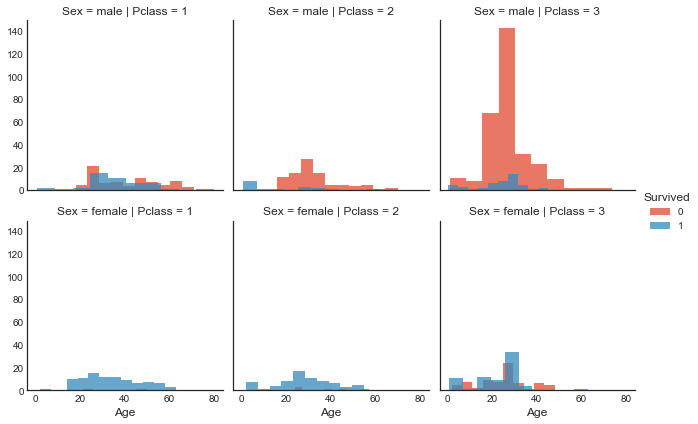

In [38]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


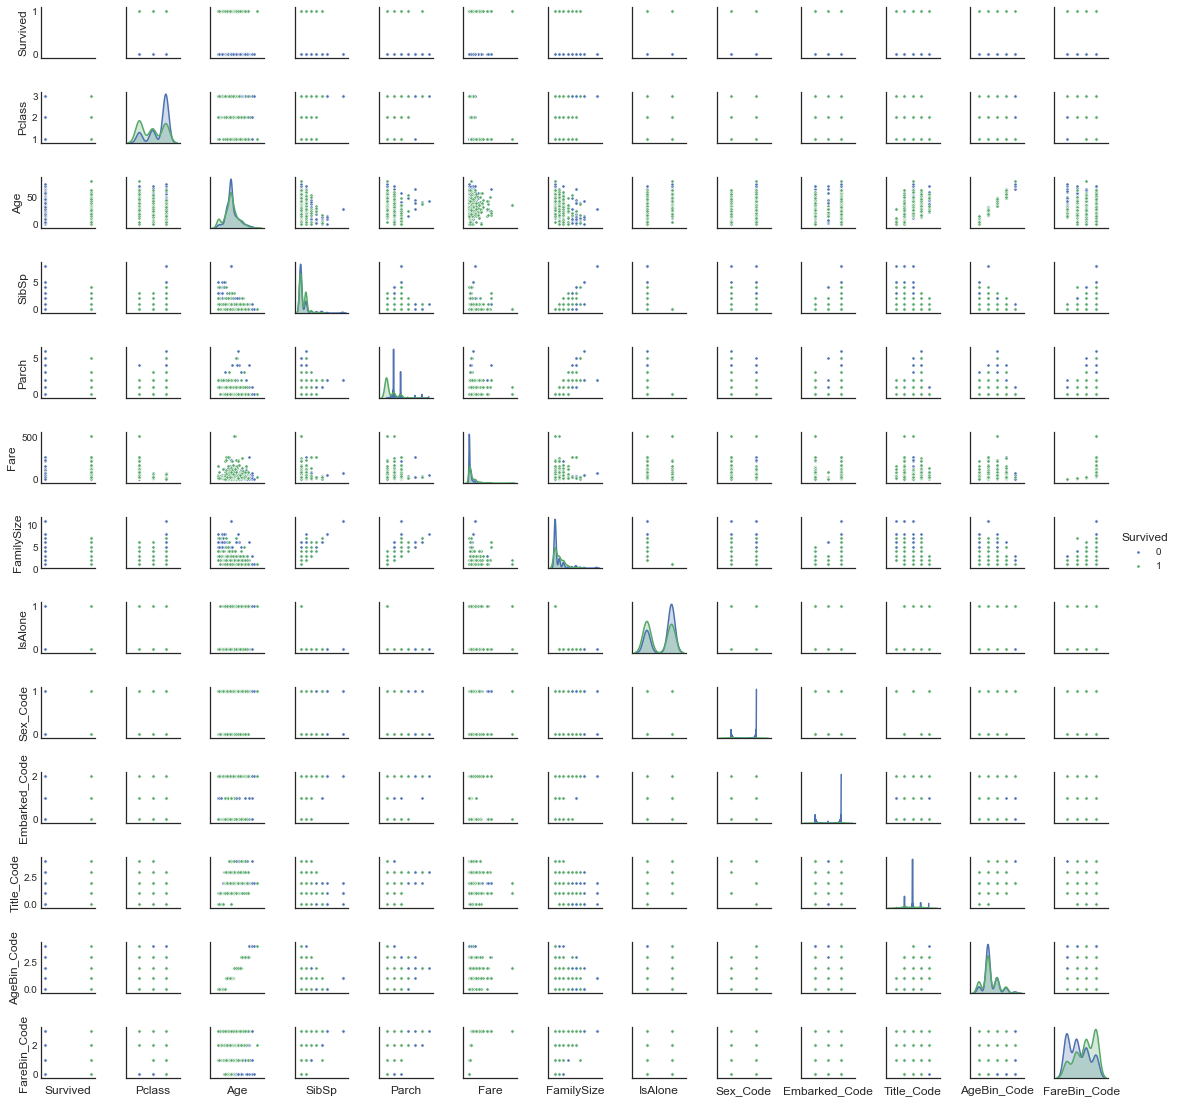

In [39]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

In [ ]:
# correlation heatmap of dataset 
def correlation_heatmap(df):
    _,ax = plt.subplots(figsize=(14,12)) 
    